<a href="https://colab.research.google.com/github/Bharadwaj0906/Nlp-algorithm-comparison-model-using-machine-learning/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NLP ALgorithm Comparision Model Using Machine Learning**

This project was created in an attempt to learn and understand how various classification algorithms work within a Natural Language Processing Model. Natural Language Processing, which I will now refer to as NLP, is a branch of machine learning that focuses on enabling computers to interpret and process human languages in both speech and text forms.

In this pipeline, I go through the following steps:<br>

Import required packages and libraries<br>
Import the dataset<br>
Process text in the dataset before it can be analyzed by the computer<br>
Create a Bag of Words model<br>
Splitting the dataset into Train & Test sets<br>
Naive Bayes Algorithm<br>
Decision Tree Algorithm<br>
Random Forest Algorithm<br>
Comparing Accuracy, Precision, Recall, and F1 Scores<br>

## Problem Statement

For this project, I will be using a dataset sourced from Kaggle, which contains 1000 reviews for a pizzeria by different users.

Humans can read a review and tell whether it is positive or negative. What if we could create a model to classify them as positive or negative? What’s the best way to do this?

First, let’s talk about the process. We start off by pre-processing the data, removing unnecessary words that don’t help our prediction. Then, we take important words in their stemmed forms (e.g lov is the stem for loved, loving, or lovely). We then train the machine to learn which reviews are positive based on their word stems. After that we test the data using similar information, to see how accurately our machine can predict whether a review is positive or negative (1 or 0).

## Importing basic libraries
Here, we import all the libraries required for this model to work. Before you begin, make sure you have all the dependencies installed. We will be working mainly with pandas, numpy, re, nltk, matplotlib, and sci-kit learn.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Importing the dataset
In the code below, I am using a .tsv file, rather than a .csv file. The difference is easier to tell when we break down the acronyms. A .tsv (tab-separated values) is separated by spaces in the text file, whereas a .csv (comma separated values) uses commas to separate the different values.

pd.read_csv can be used for both, but to specify a tsv file, I added the ‘\t’ in the delimiter to tell the machine that values are separated by tabs and not commas. Quoting has been set to 3 since our reviews contain some double quotes, and the machine would not be able to interpret them as regular text if we didn’t add this line.
Below we can see the first 10 reviews of our dataset and the outcome: positive(1) or negative(0)

In [ ]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [ ]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


#EDA

In [ ]:
# Generate summary statistics for the 'messages'
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
# Print information about the 'messages' 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# Describing the reviews after grouping 
df.groupby('Liked').describe()

Review                                    
       count unique                     top freq
Liked                                           
0        500    497  The food was terrible.    2
1        500    499      I love this place.    2

In [ ]:
# Check for the lengths of the Review texts
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [ ]:
# Generate summary statistics for the 'Length' column of the 'messages' DataFrame
df.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [ ]:
# Printing the longest review 
df_149 =df[df['Length'] == 149]['Review']


for message in df_149:
    print(message)


The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).


### Data Visualization

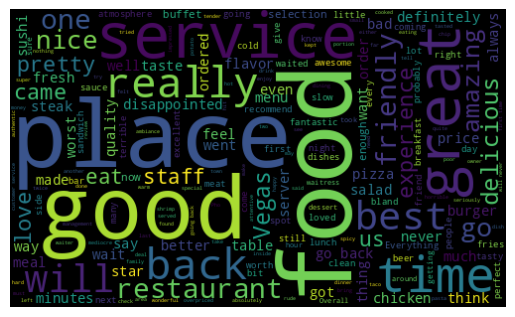

In [ ]:
from wordcloud import WordCloud

# Combine all messages into a single string
all_messages = ' '.join(df['Review'])

# Create a WordCloud object with the desired settings
wordCloud = WordCloud(width=500, height=300, random_state=20, max_font_size=100).generate(all_messages)

# Display the WordCloud image
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

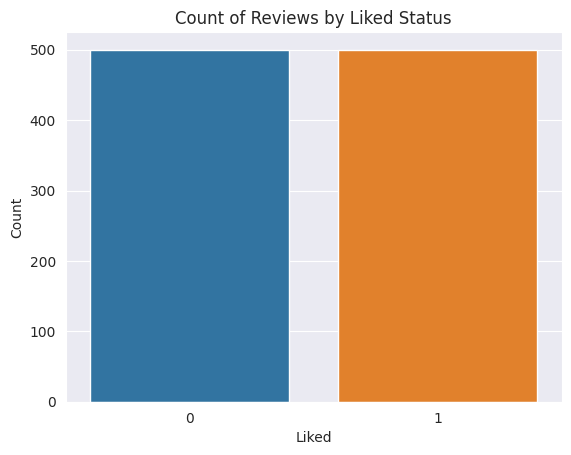

In [ ]:
# Set the style of the plot
sns.set_style('darkgrid')

# Create a count plot of the "Liked" column
sns.countplot(x='Liked', data=df)

# Set the title of the plot
plt.title('Count of Reviews by Liked Status')

# Set the label for the x-axis
plt.xlabel('Liked')

# Set the label for the y-axis
plt.ylabel('Count')

# Show the plot
plt.show()


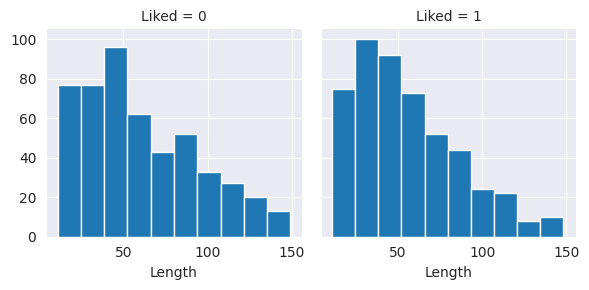

In [ ]:
# Create a FacetGrid object with 'Liked' as the column to be used for separating the data
# FacetGrid is a grid of subplots that displays the same relationship between different subsets of your data.
g = sns.FacetGrid(df, col='Liked')

# Use the FacetGrid object to plot a histogram of the 'Length' column for each value of 'Liked'
g.map(plt.hist, 'Length');

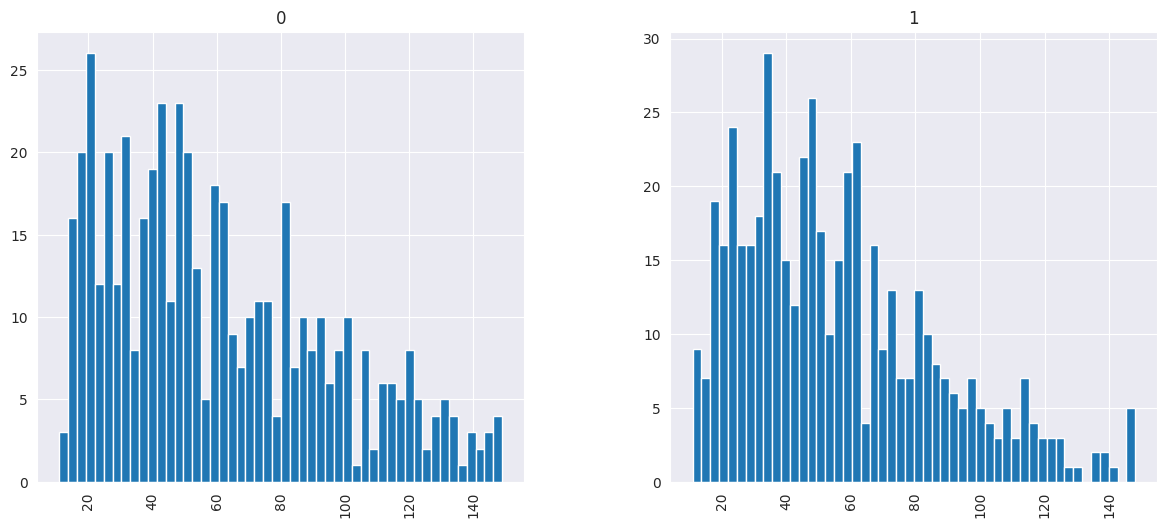

In [ ]:
# Comparing length of messages according to category
df.hist(column='Length', by='Liked', bins=50,figsize=(14,6));

In [ ]:
# Check for correlation
df.corr()

<ipython-input-18-c2a0fd720b9b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Liked,Length
Liked,1.000000,-0.075285
Length,-0.075285,1.000000


<ipython-input-51-1c964f2fb6a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm');


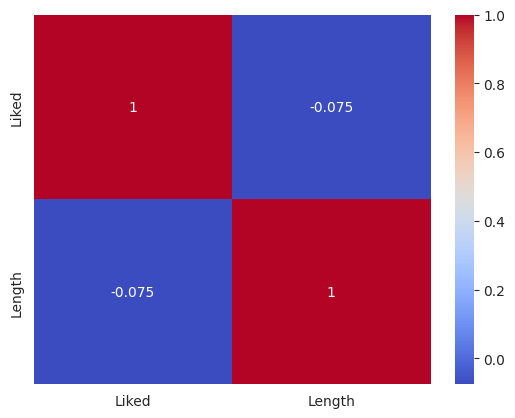

In [ ]:
# Display a heatmap with correlation values
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

# Text-Preprocessing

The code below shows the most important step of this model. I started by importing Regex as re. This class allows us to match and search for string objects. I used the sub-function of re to allow the machine to include the elements of the data we require, which are letters A-Z in upper and lower case.

I also imported nltk which stands for Natural Language Toolkit. From nltk, I imported 2 classes: the stopwords class, and the PorterStemmer class.

stopwords allow us to remove words that would not help our model (such as “the”, “an”, “this” etc). The stopwords class already contains these words, so I didn’t have to manually enter them. I used a for loop to specify to the machine that we need to take out the word if it doesn’t exist in the stopwords class.

PorterStemmer allows us to take the stem of a word and classify it as a common predictor for similar words. For example, in the first review, “Lov” is the stem for words such as “loving” or “loved”, which would both essentially translate to a positive review, thus allowing our model to have fewer words.

Finally, to apply the preprocessing steps to all the 1000 reviews in our dataset, I added another for loop before the text-processing steps.



In [ ]:
corpus = []
for i in range (0, 1000):
    # Removing unnecessary punctuations and numbers except letters and replacing removed words with space.
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    # Converting review to lowercase
    review = review.lower()
    # Converting review to list(of strings)
    review = review.split()
    # Loop through all words and keep those which are not in stopwords list.
    # set is much faster than a list and is considered when the review is very large eg. an article,a book
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    # Joining back the review list to a string with each word seperated by a space.
    review = ' '.join(review)
    corpus.append(review)

# Creating a bag-of-words model

The Bag of Words model allows us to extract features from our textual data and in this example, we take out all the words from each of the observations and pool them together in a sort of “bag” to reduce redundancy by not counting duplicates. I did this by importing the CountVectorizer class from sklearn.

Each word forms its own column in a way, and since there are so many words, we could have a huge number of columns. However, I specified the maximum number of columns using the max_features parameter of the CountVectorizer class.

Then all I had to do was fit the column of words to the X (input) variable and specified y (output) variable as our second column in the dataset, which gives you a 1 or 0, depending on whether the review was positive or negative respectively.

In [ ]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

# Splitting into Training and Test sets

I then had to split the dataset into a training set and a test set, and used a test size of 0.2, so that we have 800 values to train our dataset and 200 values to test it with.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


Now that I’m done with all the pre-processing steps, I’m going to start applying some classification algorithms to model to help it predict reviews.



## Naive Bayes Model
The first model I use is the Naive Bayes Model. In machine learning, naive Bayes classifiers are a family of simple “probabilistic classifiers” based on applying Bayes’ theorem with strong (naive) independence assumptions between the features.

All naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. In our model, the naive Bayes algorithm looks at particular keywords of a review to describe whether it is positive or negative, depending on the output set.

In the code below, I imported the GaussianNB class, which assumes that our data is normally distributed (with a Gaussian Bell Curve).

## Fitting Naive Bayes to the Training set

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)



GaussianNB()

## Predicting the Test set results
I created y_pred_NB, which is where our model’s predictions would be stored. The output below shows us what the prediction matrix looks like. It’s a bunch of 1s and 0s, like our y_train dataset. These are the predictions made by our model. y_pred_NB can be compared to y_test and determine how accurate our model is.

In [ ]:
y_pred_NB = classifier.predict(X_test)
y_pred_NB

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1])

## Making the Confusion Matrix
The confusion matrix for Naive Bayes shows us our True Negatives on the top left, False Negatives on the top right, True Positives on the bottom right, and False Positives on the bottom left.

Below, I’ve coded the numbers for each with acronyms using T for True, F for False, N for negative, P for positive.

In [ ]:
cm_NB = confusion_matrix(y_test, y_pred_NB) 
cm_NB

array([[55, 42],
       [12, 91]])

Below, I will use the True/False Positives and Negatives to calculate the Accuracy, Precision, Recall, and F1 scores.

In [ ]:
TP_NB = 91 #True Positives (Naive Bayes)
TN_NB = 55 #True Negatives (Naive Bayes)
FP_NB = 12 #False Positives (Naive Bayes)
FN_NB = 42 #False Negatives (Naive Bayes)


## Accuracy of the Naive Bayes Algorithm
Accuracy is as the name goes. It measures the accuracy by adding True predictions and dividing them by the total number of predictions.

In [ ]:
Accuracy_NB = (TP_NB + TN_NB) / (TP_NB + TN_NB + FP_NB + FN_NB)
Accuracy_NB 

0.73

## Precision of the Naive Bayes Algorithm
Precision refers to the closeness of two or more measurements to each other. It’s calculated by dividing True Positives from Total Positives

In [ ]:
Precision_NB = TP_NB / (TP_NB + FP_NB)
Precision_NB

0.883495145631068

## Recall of the Naive Bayes Algorithm
Recall is the ratio of correctly predicted positive observations to all observations in the actual class. Divide True positive by the sum of True Positives and False Negatives.

In [ ]:
Recall_NB = TP_NB / (TP_NB + FN_NB)
Recall_NB

0.6842105263157895

## F1 Score of the Naive Bayes Algorithm
The F1 Score is the weighted average of Precision and Recall. F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution. It is calculated by multiplying the Precision and Recall, dividing the result by the sum of Precision and Recall, and multiplying the final result by 2.

In [ ]:
F1_Score_NB = 2 * Precision_NB * Recall_NB / (Precision_NB + Recall_NB) 
F1_Score_NB

0.7711864406779663

# Decision Tree
The next algorithm I used is the decision tree. Decision trees allow you to develop classification systems that predict or classify future observations based on a set of decision rules.

## Fitting Decision Tree Classification to the Training set

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results

In [ ]:
y_pred_DT = classifier.predict(X_test)
y_pred_DT

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0])

## Making the Confusion Matrix

In [ ]:
cm_DT = confusion_matrix(y_test, y_pred_DT)
cm_DT

array([[74, 23],
       [35, 68]])

In [ ]:
TP_DT = 68 #True Positives (Decision Tree)
TN_DT = 74 #True Negatives (Decision Tree)
FP_DT = 35 #False Positives (Decision Tree)
FN_DT = 23 #False Negatives (Decision Tree)

## Accuracy of the Decision Tree Algorithm

In [ ]:
Accuracy_DT = (TP_DT + TN_DT) / (TP_DT + TN_DT + FP_DT + FN_DT)
Accuracy_DT

0.71

## Precision of the Decision Tree Algorithm

In [ ]:
Precision_DT = TP_DT / (TP_DT + FP_DT)
Precision_DT

0.6601941747572816

## Recall of the Decision Tree Algorithm

In [ ]:
Recall_DT = TP_DT / (TP_DT + FN_DT)
Recall_DT

0.7472527472527473

## F1 score of the Decision Tree Algorithm

In [ ]:
F1_Score_DT = 2 * Precision_DT * Recall_DT / (Precision_DT + Recall_DT)
F1_Score_DT

0.7010309278350515

## Random Forest
Finally, I used the Random Forest algorithm, which is just a combination of a number of decision trees. In my example, I chose to use 300 trees, but I could change that number depending on the kind of accuracy I want from the model.

## Fitting Random Forest Classification to the Training set

In [ ]:
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)


## Predicting the Test set results

In [ ]:
y_pred_RF = classifier.predict(X_test)
y_pred_RF

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0])

## Making the Confusion Matrix

In [ ]:
cm_RF = confusion_matrix(y_test, y_pred_RF) 
cm_RF

array([[87, 10],
       [47, 56]])

In [ ]:
TP_RF = 56 #True Positives (Random Forest)
TN_RF = 87 #True Negatives (Random Forest)
FP_RF = 47 #False Positives (Random Forest)
FN_RF = 10 #False Negatives (Random Forest)

## Accuracy of Random Forest

In [ ]:
Accuracy_RF = (TP_RF + TN_RF) / (TP_RF + TN_RF + FP_RF + FN_RF)
Accuracy_RF

0.715

## Precision of Random Forest

In [ ]:
Precision_RF = TP_RF / (TP_RF + FP_RF)
Precision_RF

0.5436893203883495

## Recall of Random Forest

In [ ]:
Recall_RF = TP_RF / (TP_RF + FN_RF)
Recall_RF

0.8484848484848485

## F1 score of Random Forest

In [ ]:
F1_Score_RF = 2 * Precision_RF * Recall_RF / (Precision_RF + Recall_RF)
F1_Score_RF

0.6627218934911243

# Comparing Models
In this last section, I will compare the accuracy, precision, recall, and F1 Scores of each algorithm I used. I will plot them on bar charts to give us a graphical representation of how the different models compare to each other.

## Comparing Model Accuracy

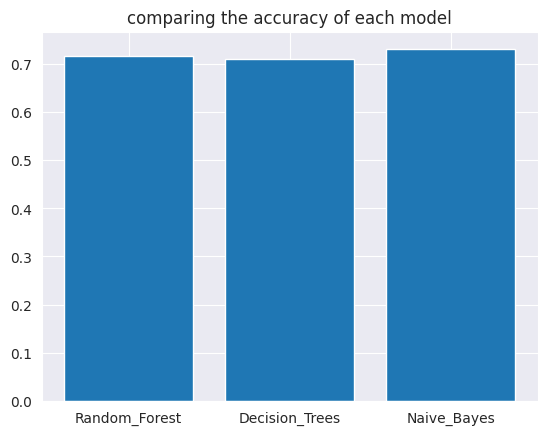

In [ ]:
Accuracy = [Accuracy_RF, Accuracy_DT, Accuracy_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('comparing the accuracy of each model')
plt.show()

As we can see in the barplot above, Naive Bayes has the highest accuracy of all of the algorithms with 73% correct predictions. Decision Trees and Random Forest algorithms are also close with 71% and 71.5% accuracy respectively.

## Comparing Model Precision

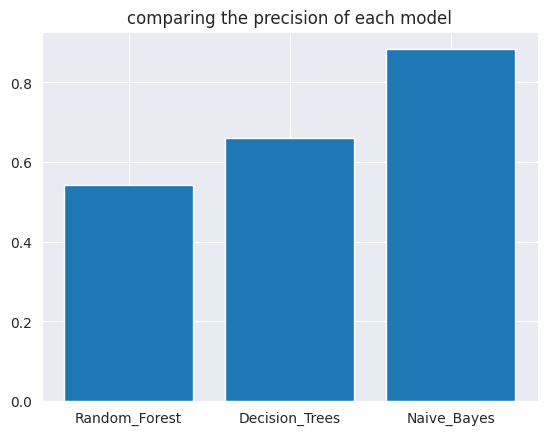

In [ ]:
Precision = [Precision_RF, Precision_DT, Precision_NB]
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('comparing the precision of each model')
plt.show()

Naive Bayes is the most precise model, with a precision of 88.35%, whereas Decision Trees have a precision of 66%. Random Forests have the lowest precision rate of about 54.4%.

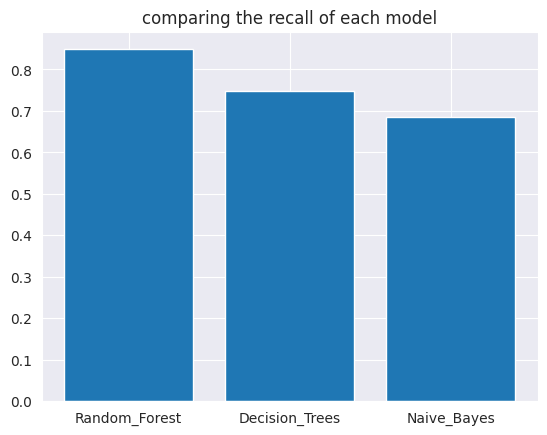

In [ ]:
Recall = [Recall_RF, Recall_DT, Recall_NB]
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('comparing the recall of each model')
plt.show()

Random Forests have the highest recall of about 84.8%, whereas Decision Trees have a recall of 74.7%. Naive Bayes had the lowest recall with 68.4%

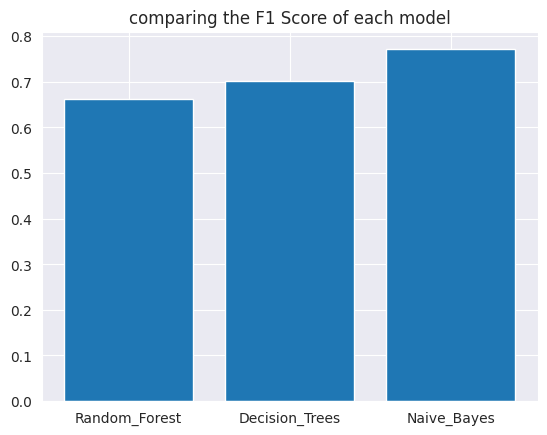

In [ ]:
F1_Score = [F1_Score_RF, F1_Score_DT, F1_Score_NB]
F1_Score_pos = np.arange(len(Methods))
plt.bar(F1_Score_pos, F1_Score)
plt.xticks(F1_Score_pos, Methods)
plt.title('comparing the F1 Score of each model')
plt.show()

Naive Bayes has the highest F1 score of 77.1% <br>
Decision Trees have an F1 score of 70.1%. <br>
Random Forest has the lowest F1 Score of 66.2% <br>